<a href="https://colab.research.google.com/github/VitorSancho/Estudos_EstatisticaParaDSeMLUdemy/blob/main/Curso_Estat%C3%ADstica_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seção 3 - Dados Absolutos e Relativos




In [1]:
import pandas as pd
from google.colab import drive
import numpy as np

## Pencentuais

In [2]:
dados={'emprego':['Adm_banco_de_dados','Programador','Arquiteto'],
       'nova_jersey':[97350,82080,112840],
       'florida':[77140,71540,62310]}

dataset=pd.DataFrame(dados)       

In [3]:
dataset['%_florida']=round((dataset.florida/dataset.florida.sum())*100,2)
dataset['%_nova_jersey']=round((dataset.nova_jersey/dataset.nova_jersey.sum())*100,2)
dataset

,emprego,nova_jersey,florida,%_florida,%_nova_jersey
0,Adm_banco_de_dados,97350,77140,36.56,33.31
1,Programador,82080,71540,33.91,28.08
2,Arquiteto,112840,62310,29.53,38.61


In [4]:
drive.mount('/content/drive')
census=pd.read_csv("/content/drive/My Drive/census.csv")

Mounted at /content/drive


In [5]:
census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Criando tabela de frequencia para dados categóricos - variável qualitativa ordinal

In [6]:
censo_educacao_renda=census[['education','income']]
censo_agrupado=censo_educacao_renda.groupby(['education','income'])['education'].count()


In [7]:
bacharelado_menor_que_50K,bacharelado_maior_que_50K=censo_agrupado[' Bachelors',' <=50K'],censo_agrupado[' Bachelors',' >50K']

In [8]:
total_bachareis=bacharelado_menor_que_50K+bacharelado_maior_que_50K
percent_maior_que50K=(round(bacharelado_maior_que_50K/total_bachareis,3))*100
percent_menor_que50K=(round(bacharelado_menor_que_50K/total_bachareis,3))*100

print(f'{percent_maior_que50K}% dos bachareis ganham mais de 50K anuais')
print(f'{percent_menor_que50K}% dos bachareis ganham menos de 50K anuais')

41.5% dos bachareis ganham mais de 50K anuais
58.5% dos bachareis ganham menos de 50K anuais


In [9]:
dados={'Ano Graduação':['1°','2°','3°','4°','Total'],
       'Matrículas março':[70,50,47,23,190],
       'Matrículas novembro':[65,48,40,22,175]}

tabela=pd.DataFrame(dados)
tabela['Evasão']=tabela['Matrículas março']-tabela['Matrículas novembro']
tabela['% Evasão']=round(tabela['Evasão']/tabela['Matrículas março'],3)
tabela['evasão a cada 100 alunos']=np.floor(tabela['% Evasão']*100)
tabela

,Ano Graduação,Matrículas março,Matrículas novembro,Evasão,% Evasão,evasão a cada 100 alunos
0,1°,70,65,5,0.071,7.0
1,2°,50,48,2,0.040,4.0
2,3°,47,40,7,0.149,14.0
3,4°,23,22,1,0.043,4.0
4,Total,190,175,15,0.079,7.0


# Seção 4 - Distribuição de frequência

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [11]:
dados=np.array([160,165,167,164,166,160,161,150,152,173,160,155,
                164,168,162,161,168,163,156,155,169,151,170,164,155,
                152,163,160,155,157,156,158,158,161,154,161,156,172,153])

In [12]:
dados=np.sort(dados)
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 161, 161, 161, 161, 162, 163,
       163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172, 173])

In [13]:
minimo=dados.min()
maximo=dados.max()

In [14]:
np.unique(dados,return_counts=True)

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 172, 173]),
 array([1, 1, 2, 1, 1, 4, 3, 1, 2, 4, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1]))

In [15]:
n=len(dados)
n

39

In [16]:
i=round(1+3.3*np.log10(n))
i

6

In [17]:
Amplitute_geral=maximo-minimo
Amplitute_geral

23

In [18]:
h=math.ceil(Amplitute_geral/i)

## Construção da distribuição de frequência 

In [19]:
intervalos=np.arange(minimo,maximo+2,step=h)
intervalos


array([150, 154, 158, 162, 166, 170, 174])

In [20]:
faixa_de_valores=[0,0,0,0,0,0]

for i in range(n):
  valor=dados[i]

  
  # print(valor)
  for j in range(len(intervalos)):
    # print(faixa)
    # print(j)
    if valor>=intervalos[j] and valor<intervalos[j+1]:
      # print("sim")
      faixa_de_valores[j]=faixa_de_valores[j]+1
          
      continue
faixa_de_valores

[5, 9, 10, 7, 5, 3]

In [21]:
lista_classes=[]

for i in range(len(faixa_de_valores)):
  lista_classes.append(str(intervalos[i]) + "-|" + str(intervalos[i+1]))

lista_classes  

['150-|154', '154-|158', '158-|162', '162-|166', '166-|170', '170-|174']

Text(0, 0.5, 'frequência')

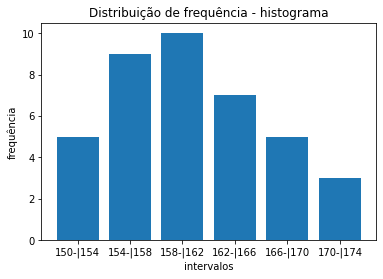

In [22]:
plt.bar(lista_classes,faixa_de_valores)
plt.title('Distribuição de frequência - histograma')
plt.xlabel('intervalos')
plt.ylabel('frequência')

### Distribuição de frequência e histograma com numpy e matplotlib

In [23]:
dados=np.array([160,165,167,164,166,160,161,150,152,173,160,155,
                164,168,162,161,168,163,156,155,169,151,170,164,155,
                152,163,160,155,157,156,158,158,161,154,161,156,172,153])

In [24]:
frequencia,classes=np.histogram(dados,bins=i,range=(minimo,maximo+1))

print(faixa_de_valores)
frequencia,classes


[5, 9, 10, 7, 5, 3]


(array([ 6, 10, 14,  6,  3]),
 array([150. , 154.8, 159.6, 164.4, 169.2, 174. ]))

(array([ 6., 10., 14.,  6.,  3.]),
 array([150. , 154.8, 159.6, 164.4, 169.2, 174. ]),
 <a list of 5 Patch objects>)

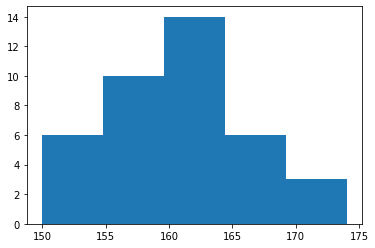

In [25]:
plt.hist(dados,bins=classes)

### Distribuição de frequência e histogramas com pandas e seaborn

In [26]:
dataset=pd.DataFrame({'dados':dados})
dataset.head()

,dados
0,160
1,165
2,167
3,164
4,166


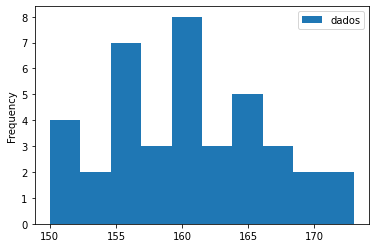

In [27]:
dataset.plot.hist();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


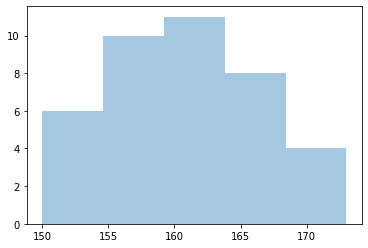

In [28]:
sns.distplot(dados,hist=True,kde=False);

In [29]:
# idades=census['age']
# idades=pd.DataFrame(agrupados)
# menor_idade=idades.min()
# maior_idade=idades.max()

# frequencia,classes=np.histogram(idades,bins=10,range=(menor_idade[0],maior_idade[0]))
# # frequencia,classes

# sns.histplot(idades,kde=False,bins=classes)



### Como fatiar dataset de acordo com lista que é passada como bins

In [30]:
census['age']=pd.cut(census['age'],bins=[0,17,25,40,60,90],
                      labels=['Faixa1','Faixa2','Faixa3','Faixa4','Faixa5'])

In [31]:
census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa3,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Faixa4,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Faixa3,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Regras de associação de acordo com distribuição de frequência

Para construir regras de associação a entrada de dados deve conter dados categóricos

In [32]:
census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa3,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Faixa4,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Faixa3,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
dataset_apriori=census[['age','workclass','education', 'marital-status',
                         'relationship','occupation','sex','native-country','income']]
dataset_apriori.head()

,age,workclass,education,marital-status,relationship,occupation,sex,native-country,income
0,Faixa3,State-gov,Bachelors,Never-married,Not-in-family,Adm-clerical,Male,United-States,<=50K
1,Faixa4,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,Exec-managerial,Male,United-States,<=50K
2,Faixa3,Private,HS-grad,Divorced,Not-in-family,Handlers-cleaners,Male,United-States,<=50K
3,Faixa4,Private,11th,Married-civ-spouse,Husband,Handlers-cleaners,Male,United-States,<=50K
4,Faixa3,Private,Bachelors,Married-civ-spouse,Wife,Prof-specialty,Female,Cuba,<=50K


In [34]:
amostra_dataset_apriori=dataset_apriori.sample(n=1000)

Para a utilização da biblioteca que realiza as regras de associação, é necessário transformar os dados em listas

In [35]:
transacoes=[]

for i in range(amostra_dataset_apriori.shape[0]):
    transacoes.append([str(amostra_dataset_apriori.values[i,j]) for j in range(amostra_dataset_apriori.shape[1])])

In [36]:
transacoes[:2]

[['Faixa5',
  ' Self-emp-not-inc',
  ' Some-college',
  ' Married-civ-spouse',
  ' Husband',
  ' Sales',
  ' Male',
  ' United-States',
  ' <=50K'],
 ['Faixa5',
  ' ?',
  ' HS-grad',
  ' Married-civ-spouse',
  ' Husband',
  ' ?',
  ' Male',
  ' United-States',
  ' <=50K']]

In [37]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=555099ab57947664ccfb28f6641bedfb59d58391a635a898917e1221d006ce4f
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [38]:
from apyori import apriori

min_suport-->estipula um valor mínimo de frequência relativa que um atributo deve ter para que seja considerado na atribuição das regras

________________________________________________________________________________
min_confidence-->define o valor minimo de asociação entre dois atributos para que seja considerado na atribuição da regra

In [39]:
regras=apriori(transacoes,min_suport=0.3,min_confidence=0.2)
resultados=list(regras)

In [40]:
resultados[12]

RelationRecord(items=frozenset({'Faixa3'}), support=0.374, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Faixa3'}), confidence=0.374, lift=1.0)])

# Seção 5 - Medidas de posição e dispersão

In [41]:
dados=np.array([160,165,167,164,166,160,161,150,152,173,160,155,
                164,168,162,161,168,163,156,155,169,151,170,164,155,
                152,163,160,155,157,156,158,158,161,154,161,156,172,153])

In [42]:
import numpy as np
import statistics
from scipy import stats
import math

Média

In [43]:
statistics.mean(dados)

160

Moda

In [44]:
stats.mode(dados)[0][0]

155

Mediana

In [45]:
statistics.median(dados)

160

In [46]:
np.median(dados)

160.0

Média ponderada

In [47]:
notas=np.array([9,8,7,3])
pesos=np.array([1,2,3,4])

np.average(notas,weights=pesos)

5.8

### Média, Moda e Mediana para distribuição de frequência - dados grupados



In [48]:
dados={'inferior':[150,154,158,162,166,170],
       'superior':[154,158,162,166,170,174],
       'fi':[5,9,11,7,5,3]}

dados_agrupados=pd.DataFrame(dados)
dados_agrupados['xi']=(dados_agrupados['inferior']+dados_agrupados['superior'])/2
dados_agrupados['fi.xi']=dados_agrupados['fi']*dados_agrupados['xi']

acumulado=0
valores_acumulados=[]
for linha in dados_agrupados.iterrows():
  acumulado+=linha[1][2]
  valores_acumulados.append(acumulado)

dados_agrupados['Fi']=valores_acumulados

In [49]:
dados_agrupados

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5.0
1,154,158,9,156.0,1404.0,14.0
2,158,162,11,160.0,1760.0,25.0
3,162,166,7,164.0,1148.0,32.0
4,166,170,5,168.0,840.0,37.0
5,170,174,3,172.0,516.0,40.0


### Medidas Separatrizes

In [50]:
dados_impar=[150,151,152,152,153,154,155,155,155]

In [51]:
np.quantile(dados_impar,[0.25,0.5,0.75])
# np.quantile(dados_impar ,0.5)
# np.quantile(dados_impar ,0.75)

array([152., 153., 155.])

In [52]:
stats.scoreatpercentile(dados_impar,[25,50,75])

array([152., 153., 155.])

In [53]:
quartis_dados_impar=pd.DataFrame(dados_impar).quantile([0.25,0.5,0.75])
quartis_dados_impar

,0
0.25,152.0
0.50,153.0
0.75,155.0


In [54]:
quartis_dados_impar=pd.DataFrame(dados_impar)
quartis_dados_impar.describe()

,0
count,9.000000
mean,153.000000
std,1.870829
min,150.000000
25%,152.000000
50%,153.000000
75%,155.000000
max,155.000000


## Medidas de dispersão

In [55]:
dados=np.array([160,165,167,164,166,160,161,150,152,173,160,155,
                164,168,162,161,168,163,156,155,169,151,170,164,155,
                152,163,160,155,157,156,158,158,161,154,161,156,172,153])

In [56]:
stats.variation(dados)

0.03680879396517965

desvio padrão para dados agupados

In [57]:
dados_agrupados['xi_2']=dados_agrupados['xi']**2
dados_agrupados['fi_xi2']=dados_agrupados['xi_2']*dados_agrupados['fi']

num1=dados_agrupados['fi_xi2'].sum()
num2=dados_agrupados['fi.xi'].sum()
num2=math.pow(num2,2)

den1=dados_agrupados['fi'].sum()
den2=den1**2

dp=((num1/den1)-(num2/den2))**0.5
dp

5.719265687131446

In [58]:
dados_agrupados


,inferior,superior,fi,xi,fi.xi,Fi,xi_2,fi_xi2
0,150,154,5,152.0,760.0,5.0,23104.0,115520.0
1,154,158,9,156.0,1404.0,14.0,24336.0,219024.0
2,158,162,11,160.0,1760.0,25.0,25600.0,281600.0
3,162,166,7,164.0,1148.0,32.0,26896.0,188272.0
4,166,170,5,168.0,840.0,37.0,28224.0,141120.0
5,170,174,3,172.0,516.0,40.0,29584.0,88752.0


## Testes com algoritmos de classificação


In [59]:
dataset_classificacao=pd.read_csv('/content/drive/My Drive/credit_data.csv')

In [60]:
dataset_classificacao.dropna(inplace=True)

In [61]:
dataset_classificacao.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [62]:
# pegando somente as colunas income, age e loan
X=dataset_classificacao.iloc[:,1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [63]:
y=dataset_classificacao.iloc[:,4].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [65]:
resultados_naive_bayes=[]
resultados_logistica=[]
resultados_forest=[]

for i in range(30): 
  X_treinamento, X_teste, y_treinamento, y_tste=train_test_split(X,y,test_size=0.2,stratify=y,random_state=i)

  naive_bayes=GaussianNB()
  naive_bayes.fit(X_treinamento,y_treinamento)
  resultados_naive_bayes.append(accuracy_score(y_tste,naive_bayes.predict(X_teste)))  

  logistica=LogisticRegression()
  logistica.fit(X_treinamento,y_treinamento)
  resultados_logistica.append(accuracy_score(y_tste,logistica.predict(X_teste)))  

  random_forest=RandomForestClassifier()
  random_forest.fit(X_treinamento,y_treinamento)
  resultados_forest.append(accuracy_score(y_tste,random_forest.predict(X_teste)))  

In [66]:
print(resultados_naive_bayes)

[0.925, 0.925, 0.9325, 0.925, 0.92, 0.905, 0.9175, 0.9175, 0.9125, 0.9325, 0.9225, 0.9125, 0.935, 0.9175, 0.925, 0.9175, 0.9275, 0.92, 0.9325, 0.92, 0.93, 0.905, 0.9175, 0.9325, 0.9425, 0.9375, 0.94, 0.92, 0.935, 0.925]


In [67]:
print(resultados_logistica)

[0.9325, 0.91, 0.9125, 0.9225, 0.9075, 0.89, 0.91, 0.9075, 0.8775, 0.915, 0.9175, 0.9, 0.925, 0.9175, 0.9025, 0.9125, 0.9525, 0.91, 0.9225, 0.9075, 0.925, 0.905, 0.9075, 0.945, 0.9225, 0.9275, 0.9225, 0.9175, 0.91, 0.9]


In [68]:
print(resultados_forest)

[0.975, 0.985, 0.975, 0.9925, 0.98, 0.9875, 0.9875, 0.975, 0.9775, 0.985, 0.98, 0.9825, 0.98, 0.9875, 0.98, 0.98, 0.985, 0.9825, 0.9925, 0.985, 0.98, 0.9775, 0.9775, 0.985, 0.9875, 0.995, 0.99, 0.9825, 0.9925, 0.99]


In [69]:
resultados_forest=np.array(resultados_forest)
resultados_logistica=np.array(resultados_logistica)
resultados_naive_bayes=np.array(resultados_naive_bayes)

In [70]:
resultados_forest.mean(),resultados_naive_bayes.mean(),resultados_logistica.mean()

(0.9837500000000001, 0.92425, 0.9145)

In [71]:
stats.mode(resultados_forest)[0][0],stats.mode(resultados_naive_bayes)[0][0],stats.mode(resultados_logistica)[0][0]


(0.98, 0.9175, 0.9075)

In [72]:
np.median(resultados_forest),np.median(resultados_logistica),np.median(resultados_naive_bayes)

(0.98375, 0.9125, 0.925)

In [73]:
np.var(resultados_forest),np.var(resultados_logistica),np.var(resultados_naive_bayes)

(3.114583333333346e-05, 0.00020933333333333337, 8.756250000000001e-05)

In [74]:
np.std(resultados_forest),np.std(resultados_logistica),np.std(resultados_naive_bayes)

(0.005580845216751084, 0.014468356276140472, 0.00935748363610645)

In [75]:
stats.variation(resultados_forest)*100,stats.variation(resultados_logistica)*100,stats.variation(resultados_naive_bayes)*100

(0.5673031986532232, 1.5821056616884057, 1.0124407504578252)

### Validação cruzada - K-fold Cross validation

In [76]:
from sklearn.model_selection import cross_val_score,KFold

In [77]:
resultados_naive_bayes_cv=[]
resultados_logistica_cv=[]
resultados_forest_cv=[]

for i in range(30): 
  kfold=KFold(n_splits=10,shuffle=True,random_state=i)
  
  naive_bayes=GaussianNB()
  scores=cross_val_score(naive_bayes,X,y,cv=kfold)
  resultados_naive_bayes_cv.append(scores.mean())

  logistica=LogisticRegression()
  scores=cross_val_score(logistica,X,y,cv=kfold)
  resultados_logistica_cv.append(scores.mean())

  random_forest=RandomForestClassifier()
  scores=cross_val_score(random_forest,X,y,cv=kfold)
  resultados_forest_cv.append(scores.mean())

In [78]:
stats.variation(resultados_forest_cv)*100,stats.variation(resultados_logistica_cv)*100,stats.variation(resultados_naive_bayes_cv)*100

(0.1952133090514193, 0.38801026116292653, 0.08641071566366061)

utilizando validação cruzada, os resultados do naive bayes tiveram menor dispersão que o random forest, resultado contrário do que foi observado ao realizar a amostragem padrão dos dados entre grupos de testes e grupos de treinamento

## Seleção de atributos utilizando variancia

In [79]:
np.random.rand(50)

array([0.41263407, 0.76291343, 0.70172217, 0.99467046, 0.62186961,
       0.91345385, 0.93950612, 0.57447177, 0.45351508, 0.17685275,
       0.45555992, 0.90370662, 0.35320211, 0.79986205, 0.09652846,
       0.25405617, 0.4077078 , 0.24801776, 0.76388427, 0.35656903,
       0.63890161, 0.86152479, 0.6808914 , 0.23224023, 0.70197185,
       0.47462768, 0.12778312, 0.70891444, 0.0836387 , 0.85367553,
       0.28320973, 0.29034987, 0.71821015, 0.59979379, 0.01343622,
       0.28936184, 0.32865769, 0.47822277, 0.81123067, 0.21238512,
       0.27510491, 0.24573506, 0.75723439, 0.94401991, 0.86186408,
       0.26391086, 0.67975017, 0.55950002, 0.20044692, 0.72828333])

In [80]:
base_selecao={'a':np.random.rand(20),
              'b':np.array([0.5]*20),
              'classe':np.random.randint(0,2,size=20)}

In [81]:
base_selecao

{'a': array([0.28469559, 0.93445841, 0.94637309, 0.51936873, 0.38873385,
        0.43652409, 0.47495783, 0.09135232, 0.61370455, 0.58541349,
        0.84313149, 0.70316707, 0.5657728 , 0.71238318, 0.47898763,
        0.29792617, 0.80032909, 0.64304201, 0.88025954, 0.90351991]),
 'b': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'classe': array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0])}

In [82]:
df=pd.DataFrame(base_selecao)
df.head()

,a,b,classe
0,0.284696,0.5,1
1,0.934458,0.5,0
2,0.946373,0.5,1
3,0.519369,0.5,1
4,0.388734,0.5,0


In [83]:
df.describe()

,a,b,classe
count,20.000000,20.0,20.000000
mean,0.605205,0.5,0.550000
std,0.239015,0.0,0.510418
min,0.091352,0.5,0.000000
25%,0.465349,0.5,0.000000
50%,0.599559,0.5,1.000000
75%,0.811030,0.5,1.000000
max,0.946373,0.5,1.000000


In [84]:
np.var(df['a']),np.var(df['b']),

(0.054271702728781915, 0.0)

In [85]:
X=df.iloc[:,0:2].values

In [86]:
X

array([[0.28469559, 0.5       ],
       [0.93445841, 0.5       ],
       [0.94637309, 0.5       ],
       [0.51936873, 0.5       ],
       [0.38873385, 0.5       ],
       [0.43652409, 0.5       ],
       [0.47495783, 0.5       ],
       [0.09135232, 0.5       ],
       [0.61370455, 0.5       ],
       [0.58541349, 0.5       ],
       [0.84313149, 0.5       ],
       [0.70316707, 0.5       ],
       [0.5657728 , 0.5       ],
       [0.71238318, 0.5       ],
       [0.47898763, 0.5       ],
       [0.29792617, 0.5       ],
       [0.80032909, 0.5       ],
       [0.64304201, 0.5       ],
       [0.88025954, 0.5       ],
       [0.90351991, 0.5       ]])

In [87]:
from sklearn.feature_selection import VarianceThreshold


In [88]:
selecao=VarianceThreshold(threshold=0.07)
X_novo=selecao.fit_transform(X)

ValueError: ignored

In [ ]:
X_novo

In [ ]:
selecao.variances_

In [ ]:
indices=np.where(selecao.variances_>0.07)

Observar a variancia é relevante pois sua grandeza pode determinar se um atributo é relevante ou não ao caracterizar dados.

Selecionar dados com altos valores de variancia é importante para analisar a relevancia de determinada variavel.

Fazendo a normalização dos dados

In [ ]:
# dataset_classificacao.dropna()
# income=dataset_classificacao['income']
# age=dataset_classificacao['age']
# loan=dataset_classificacao['loan']
lista_series=dataset_classificacao.iloc[:,1:4]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(lista_series)
pd.DataFrame(X)


In [ ]:
selecao=VarianceThreshold(0.07)
novo_X=selecao.fit_transform(X)
len(novo_X)

In [ ]:
np.var(X[0]),np.var(X[1]),np.var(X[2])

In [ ]:
selecao=VarianceThreshold(0.027)
novo_X=selecao.fit_transform(X)
novo_X

## Tratando dados faltantes inserindo media - variaveis qunatitativas

In [ ]:
dataset_classificacao.isnull().sum()

In [ ]:
nulos=dataset_classificacao[dataset_classificacao.isnull().any(axis=1)]
nulos

In [ ]:
media_idade=dataset_classificacao['age'].mean()
dataset_classificacao['age']=dataset_classificacao['age'].replace(to_replace=np.nan,value=media_idade)
dataset_classificacao.isnull().sum()

## Tratando dados faltantes inserindo moda - variaveis qualitativas

In [90]:
autos=pd.read_csv("/content/drive/My Drive/autos.csv",encoding='ISO-8859-1')

In [92]:
autos.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [94]:
autos['fuelType'].unique()

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [96]:
stats.mode(autos['fuelType'])

ModeResult(mode=array(['benzin'], dtype=object), count=array([223857]))

In [101]:
moda=statistics.mode(autos['fuelType'])
autos['fuelType']=autos['fuelType'].replace(to_replace=np.nan,value=moda)

Percebe-se que os dados faltante para o campo fuleType não estão mais presentes

In [102]:
autos['fuelType'].unique()

array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
      dtype=object)

# Seção 7 - Probabilidade

Permutação: De quantas maneiras é possível produzir senhas com 5 caracteres, podendo-se utilizar 26 letras ou 10 digitos, sem que hajam repetições?

In [108]:
tamanho=5
caracteres=26+10

espaco_amostral=math.factorial(caracteres)/math.factorial(caracteres-tamanho)

print(f'existem ' + str(espaco_amostral) + ' senhas possiveis de serem geradas')

existem 45239040.0 senhas possiveis de serem geradas


De quantas maneiras é possível produzir senhas com 5 caracteres, podendo-se utilizar 26 letras ou 10 digitos, podendo haver repetições?

In [109]:
tamanho=5
caracteres=26+10

espaco_amostral=math.pow(caracteres,tamanho)

print(f'existem ' + str(espaco_amostral) + ' senhas possiveis de serem geradas')

existem 60466176.0 senhas possiveis de serem geradas


Combinação: Quantos arranjos de duas letras são possíveis de serem produzidos com as letras ABCDEF, sem importar a ordem e sem 
repetições.

In [111]:
qnt_letras=6
indice_combinacao=2

combinacao=math.factorial(qnt_letras)/(math.factorial(indice_combinacao)*math.factorial(qnt_letras-indice_combinacao))

print(f'existem ' + str(combinacao) + ' combinacoes possiveis de serem geradas')

existem 15.0 combinacoes possiveis de serem geradas


Combinação: Quantos arranjos de duas letras são possíveis de serem produzidos com as letras ABCDEF, sem importar a ordem e com repetições.

In [114]:
qnt_letras=6
indice_combinacao=2

combinacao=math.factorial(qnt_letras+indice_combinacao-1)/(math.factorial(indice_combinacao)*math.factorial(qnt_letras-indice_combinacao))

print(f'existem ' + str(combinacao) + ' combinacoes possiveis de serem geradas')

existem 105.0 combinacoes possiveis de serem geradas


### Conjuntos em python

In [115]:
a=(0,1,2,3,4,5,6,7)
b=(0,2,4,6,8)

Interseção

In [116]:
set(a) and set(b)

{0, 2, 4, 6, 8}

União

In [117]:
set(a) | set(b)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

Diferença

In [118]:
set(a).difference(b)

{1, 3, 5, 7}

In [119]:
set(b).difference(a)

{8}

### Eventos dependentes e independentes

Em um grupo com 90 pessoas, 40 compraram livro de python, 3o de java e 20 compraram python e java. Ao escolher uma pessoas que compra de python, qual a probabilidade dela ter comprado java também?

In [ ]:
# calcular a probabilidade da A dado B



### Redes Bayesianas

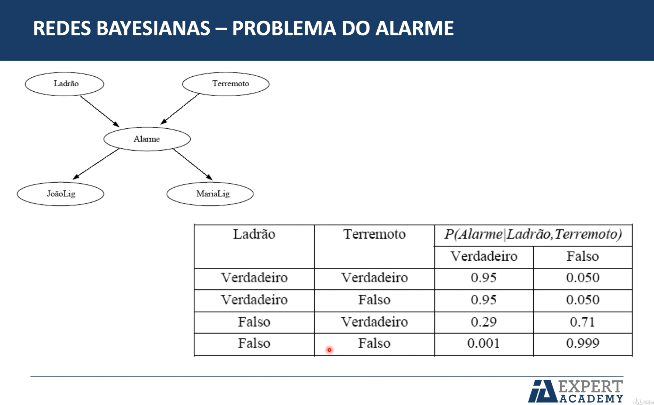